# pydot Testing

In [3]:
import pydot
import json

In [31]:
with open('component_data.json') as infile:
    comp_data = json.load(infile)
    
better_data = {}


for comp in comp_data:
    better_data[comp['componentId']] = comp
    
comp_data[1]

{'@type': 'ComponentMetadata',
 'componentId': '26b680b8-4e09-4fd7-8143-872f4eb46e47',
 'version': 3,
 'name': '[TEMP] [sub] Sub Process One',
 'type': 'process',
 'createdDate': '2025-02-25T19:49:13Z',
 'createdBy': 'andy.strubhar@argano.com',
 'modifiedDate': '2025-03-14T17:03:06Z',
 'modifiedBy': 'andy.strubhar@argano.com',
 'deleted': False,
 'currentVersion': True,
 'folderName': 'TEST SUBFOLDER',
 'folderId': 'Rjo3NDM3MDI3',
 'branchName': 'main',
 'branchId': 'QjoyNTU4NQ',
 'containsMetadata': True,
 'parentComponentIds': ['e9b2bfa0-9607-4fb5-8ebe-10379a752034'],
 'childComponentIds': ['a07be6ce-13b6-41e1-a983-f7f78503bc20',
  '04b0cc6d-2a36-44a5-8d0f-c8ccf255caf4',
  'fb128b14-fcbb-4a3b-a9d7-c466c11cd518'],
 'simple_type': 'Process'}

In [33]:
import networkx as nx

G = nx.Graph()

nodes = []
edges = []
# Add nodes
for component in comp_data:
    nodes.append((component['name'], {'id': component['componentId'], 'type': component['simple_type']}))
    
    for parent_comp in component.get('parentComponentIds'):
        
        edges.append(f"{better_data[parent_comp]['name']}-{component.get('name')}")
        
    for child_comp in component.get('childComponentIds'):
        
        edges.append(f"{component.get('name')}-{better_data[child_comp]['name']}")
    
edges = [(i.split('-')[0], i.split('-')[1]) for i in set(edges)]


G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [34]:
G.number_of_nodes()

32

In [35]:
G.number_of_edges()

12

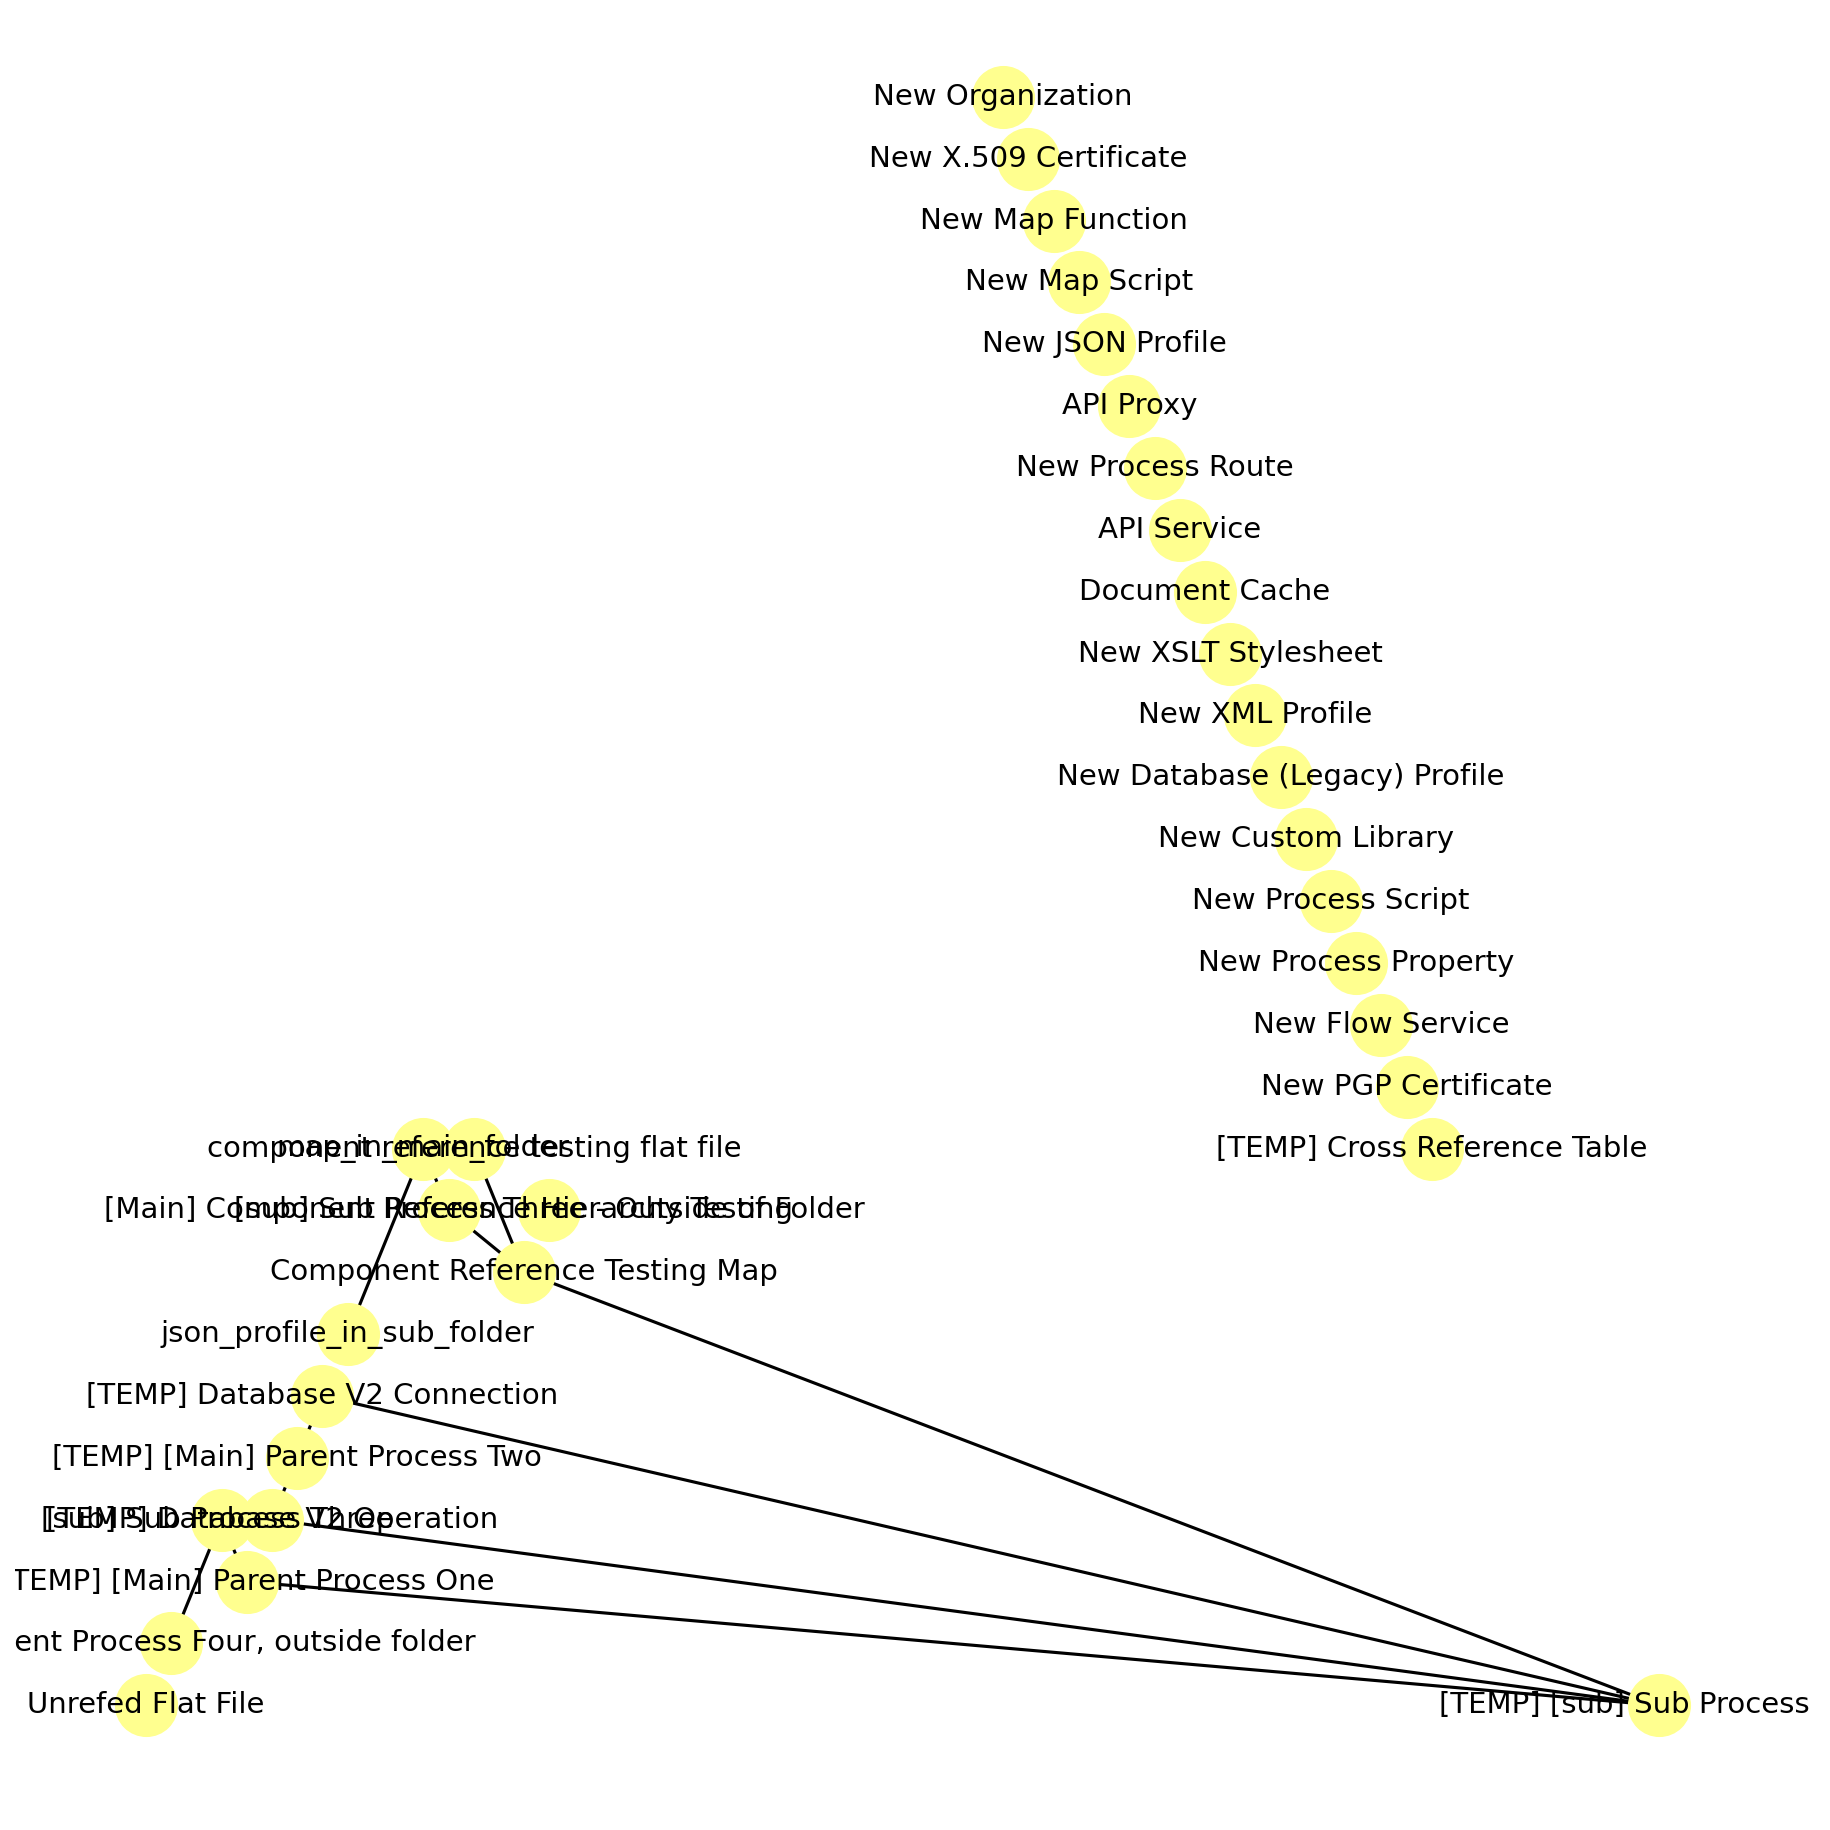

In [43]:
plt.figure(figsize=(12, 12), dpi=150)
nx.draw_planar(
    G,
    arrowsize=12,
    with_labels=True,
    node_size=800,
    node_color="#ffff8f",
    linewidths=2.0,
    width=1.5,
    font_size=14,
)

In [44]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import PIL
import math
from copy import deepcopy
from collections import deque

In [53]:
import pkg_resources
import networkx as nx
from pyvis.network import Network

NODE_SIZE_FACTOR=10 # size of node is getting smaller with depth. This is the size factor

def build_dependencies_graph():
    G = nx.Graph()
    nodes = []
    edges = []
    # Add nodes
    for component in comp_data:
        nodes.append((component['name'], {'id': component['componentId'], 'type': component['simple_type']}))
        
        for parent_comp in component.get('parentComponentIds'):
            
            edges.append(f"{better_data[parent_comp]['name']}-{component.get('name')}")
            
        for child_comp in component.get('childComponentIds'):
            
            edges.append(f"{component.get('name')}-{better_data[child_comp]['name']}")
        
    edges = [(i.split('-')[0], i.split('-')[1]) for i in set(edges)]


    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
        
    return G


g = build_dependencies_graph()
net = Network(height = 1500, width = 2000, directed=True)
net.from_nx(g)
#net.show("dependencies.html")

In [24]:

graph = pydot.Dot("my_graph", graph_type="graph", bgcolor="yellow")


edges = []
# Add nodes
for component in comp_data:
    graph.add_node(pydot.Node(component.get('name'), shape=get_graphviz_shape(component.get('simple_type'))))
    
    for parent_comp in component.get('parentComponentIds'):
        
        edges.append(f"{better_data[parent_comp]['name']}-{component.get('name')}")
        
    for child_comp in component.get('childComponentIds'):
        
        edges.append(f"{component.get('name')}-{better_data[child_comp]['name']}")
        
# Add edges

for edge in edges:
    # Or, without using an intermediate variable:
    graph.add_edge(pydot.Edge(edge.split('-')[0], edge.split('-')[-1], color="blue"))


In [27]:
import networkx

my_networkx_graph = networkx.Graph()

# See NetworkX documentation on how to build a NetworkX graph.
graph = networkx.drawing.nx_pydot.to_pydot(my_networkx_graph)

C:\Users\andys\AppData\Local\Temp\ipykernel_9064\2595652146.py:6: DeprecationWarning: nx.nx_pydot.to_pydot depends on the pydot package, which has known issues and is not actively maintained.

See https://github.com/networkx/networkx/issues/5723
  graph = networkx.drawing.nx_pydot.to_pydot(my_networkx_graph)


In [ ]:
my_networkx_graph = networkx.drawing.nx_pydot.from_pydot(graph)

In [8]:
def get_graphviz_shape(simple_comp_type):
    mapper = {
    'Profile': 'note',
    'Process': 'rectangle',
    'Connector Operation': 'octagon',
    'Connector': 'cylinder',
    'Map': 'invhouse',
    'Deployment Configs': 'component',
    'Function': 'component',
    'Other': 'oval',
    'Document Cache': 'folder'
    }
    
    return mapper.get(simple_comp_type, 'box')  # Default to 'box' if not found

# Imports

In [1]:
import json


import pandas as pd

In [3]:
with open("C:/Users/andys/Downloads/tj.json") as infile:
    raw_data = json.load(infile)
df = pd.json_normalize(raw_data)
df

,@type,componentId,version,name,type,createdDate,createdBy,modifiedDate,modifiedBy,deleted,...,folderName,folderId,branchName,branchId,containsMetadata,parentComponentIds,childComponentIds,subType,copiedFromComponentId,copiedFromComponentVersion
0,ComponentMetadata,155d87a8-35d1-48e3-91c0-1f3cb25f8777,2,[Emma] Full Member Response,profile.json,2024-10-30T13:21:31Z,andy.strubhar@argano.com,2024-10-30T13:24:26Z,andy.strubhar@argano.com,False,...,#Common,Rjo2OTczMTg5,main,QjoyNTU4NQ,True,"[eaa68f6d-7943-4065-ae76-ec904c458893, 9a26316...",[],NaN,NaN,NaN
1,ComponentMetadata,424324ef-dfb1-4ad4-b9d6-39b67c508aad,4,"[Salesforce] ContactPointEmail, CommSubscripti...",connector-action,2024-10-11T21:37:02Z,andy.strubhar@argano.com,2024-10-16T17:10:44Z,andy.strubhar@argano.com,False,...,#Common,Rjo2OTczMTg5,main,QjoyNTU4NQ,True,[],[fe840ce8-2b41-4820-90ef-842d7be9ab4a],salesforce,NaN,NaN
2,ComponentMetadata,43963a60-6325-47df-bbee-f5e1a2b5fc30,2,[Salesforce] ContactPointEmail CREATE Response,profile.xml,2024-10-15T01:53:53Z,andy.strubhar@argano.com,2024-10-15T01:54:48Z,andy.strubhar@argano.com,False,...,#Common,Rjo2OTczMTg5,main,QjoyNTU4NQ,True,"[8dfbee27-b90b-41ae-9f9d-4f082d17caaf, 769a09b...",[],NaN,NaN,NaN
3,ComponentMetadata,46db870d-60cb-4569-afbe-3c2ae690c39b,2,[Emma] Get Member from Member and Account ID,connector-action,2024-10-11T21:15:24Z,andy.strubhar@argano.com,2024-10-11T21:17:05Z,andy.strubhar@argano.com,False,...,#Common,Rjo2OTczMTg5,main,QjoyNTU4NQ,True,[cf3eab59-48da-487d-b2a9-ff88f37df3e8],[],http,NaN,NaN
4,ComponentMetadata,4f4f4652-3957-4bdf-a1ae-f86284ed8d54,2,[Salesforce] ContactPointConsent CREATE Response,profile.xml,2024-10-15T13:18:01Z,andy.strubhar@argano.com,2024-10-15T13:18:45Z,andy.strubhar@argano.com,False,...,#Common,Rjo2OTczMTg5,main,QjoyNTU4NQ,True,[8dfbee27-b90b-41ae-9f9d-4f082d17caaf],[],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,ComponentMetadata,422d16f6-e9a3-45a1-947c-e4bc811b1366,10,TSYS Mock subprocess,processroute,2024-02-22T21:14:53Z,kknapp@sc.younglife.org,2024-09-16T20:02:05Z,kknapp@sc.younglife.org,False,...,TSYS Mock Server,Rjo2NTIzMDEy,main,QjoyNTU4NQ,True,[cade38f7-d736-41c8-94a3-8cfc84868dbf],[2df167ba-a18a-44a6-ad07-0cfba321bed4],NaN,NaN,NaN
548,ComponentMetadata,d713273b-51f2-49e0-bb00-6b732e2c09e5,7,[test] Check some Transfirst requests,process,2024-09-17T21:53:36Z,kknapp@sc.younglife.org,2024-09-17T22:41:51Z,kknapp@sc.younglife.org,False,...,TSYS Mock Server,Rjo2NTIzMDEy,main,QjoyNTU4NQ,True,[],[2df167ba-a18a-44a6-ad07-0cfba321bed4],NaN,NaN,NaN
549,ComponentMetadata,c89278dc-011a-465b-bfed-4a84422ba3ce,13,[web svc] TransFirst Mock api,process,2024-09-17T20:13:50Z,kknapp@sc.younglife.org,2024-09-18T19:42:06Z,kknapp@sc.younglife.org,False,...,TSYS Mock Server,Rjo2NTIzMDEy,main,QjoyNTU4NQ,True,[],[2b266414-2aa7-4c30-b311-5451c5de0d10],NaN,NaN,NaN
550,ComponentMetadata,c6544d1e-c228-4bbc-ae4a-2e21c3c2c036,1,[test] test listener process,process,2024-01-22T22:57:05Z,kknapp@sc.younglife.org,2024-01-22T22:57:05Z,kknapp@sc.younglife.org,False,...,Salesforce Revenue Processing to Workday,Rjo2NDAxMjk5,main,QjoyNTU4NQ,True,[],[b4650f71-1c59-42f2-b4fd-d9552974929e],NaN,NaN,NaN


In [5]:
df['type'].value_counts()

type
process               268
connector-action       64
transform.map          57
profile.xml            51
documentcache          34
profile.json           33
transform.function     18
processroute           12
connector-settings      7
processproperty         2
crossref                2
profile.flatfile        2
script.processing       1
script.mapping          1
Name: count, dtype: int64